In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.naive_bayes import GaussianNB  

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import pickle

In [2]:
df = pd.read_excel('depression dataset modified.csv.xlsx')

In [3]:
df.head()

,Is there anyone in your life who can support you and be there for you?,How were you feeling lately?,Have you been sleeping well?,Have you been worried or anxious lately?,Are you enjoying your daily activities and hobbies?,Have you been feeling like you have a good support system in place?,Are you having any thoughts of self-harm or suicide?,How do you usually handle stress and negative emotions?,Have you talked to anyone about how you are feeling?,With whom do you share your feelings?,Positive,Negative,Result
0,1,3,0,0,0,0,1,1,0,1,2,6,Major Depression
1,1,1,1,1,1,1,1,2,1,1,8,0,No Depression
2,1,4,0,0,1,1,1,4,0,2,4,4,Minor Depression
3,0,3,1,0,0,0,1,2,0,3,2,6,Major Depression
4,0,3,0,0,0,1,0,2,0,2,1,7,Major Depression


In [5]:
df.head()

,Is there anyone in your life who can support you and be there for you?,How were you feeling lately?,Have you been sleeping well?,Have you been worried or anxious lately?,Are you enjoying your daily activities and hobbies?,Have you been feeling like you have a good support system in place?,Are you having any thoughts of self-harm or suicide?,How do you usually handle stress and negative emotions?,Have you talked to anyone about how you are feeling?,With whom do you share your feelings?,Positive,Negative,Result
0,1,3,0,0,0,0,1,1,0,1,2,6,Major Depression
1,1,1,1,1,1,1,1,2,1,1,8,0,No Depression
2,1,4,0,0,1,1,1,4,0,2,4,4,Minor Depression
3,0,3,1,0,0,0,1,2,0,3,2,6,Major Depression
4,0,3,0,0,0,1,0,2,0,2,1,7,Major Depression


In [4]:
df['Result'].value_counts()

Major Depression    19
Minor Depression    18
No Depression       13
Name: Result, dtype: int64

In [6]:
df.isnull().sum()

Is there anyone in your life who can support you and be there for you?    0
How were you feeling lately?                                              0
Have you been sleeping well?                                              0
Have you been worried or anxious lately?                                  0
Are you enjoying your daily activities and hobbies?                       0
Have you been feeling like you have a good support system in place?       0
Are you having any thoughts of self-harm or suicide?                      0
How do you usually handle stress and negative emotions?                   0
Have you talked to anyone about how you are feeling?                      0
With whom do you share your feelings?                                     0
Positive                                                                  0
Negative                                                                  0
Result                                                                    0
dtype: int64

In [7]:
# df.value_counts()

In [8]:
# df['Is there anyone in your life who can support you and be there for you?'].value_counts()
# df['How were you feeling lately?'].value_counts()
# df['Have you been sleeping well?'].value_count()
# df['Have you been worried or anxious lately?'].value_counts()
# df['Are you enjoying your daily activities and hobbies?'].value_counts()
# df['Have you been feeling like you have a good support system in place?'].value_counts()
# df['Are you having any thoughts of self-harm or suicide?'].value_counts()
# df['How do you usually handle stress and negative emotions?'].value_counts()
# df['Have you talked to anyone about how you are feeling?'].value_counts()
# df['With whom do you share your feelings?'].value_counts()
# df['Positive'].value_counts()
# df['Negative'].value_counts()
# df['Result'].value_counts()

In [9]:
# df.describe()

In [10]:
df.shape

(50, 13)

In [11]:
a = df['Result'].value_counts()

([<matplotlib.patches.Wedge at 0x1a6b64b1c40>,
 [Text(0.42334325160493974, 1.0692429524296883, 'Major Depression'),
  Text(-1.0692429524296883, -0.4233432516049396, 'Minor Depression'),
  Text(0.7872291969343478, -0.8383138979487945, 'No Depression')],
 [Text(0.2392809682984442, 0.6043547122428673, '38.00%'),
  Text(-0.6043547122428673, -0.23928096829844409, '36.00%'),
  Text(0.44495563304984875, -0.4738295944927968, '26.00%')])

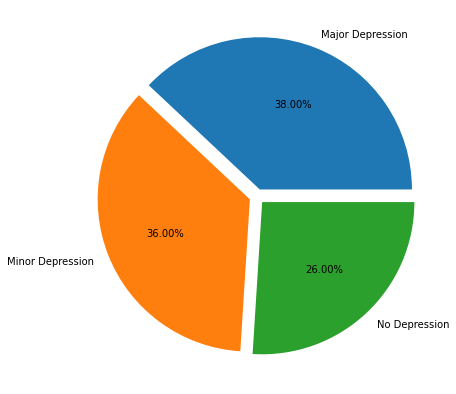

In [12]:
plt.figure(figsize=(7,7))
labels = ['Major Depression','Minor Depression','No Depression']
plt.pie(a,explode=[0.05,0.05,0.05],labels=labels,autopct="%1.2f%%")

In [13]:
df['Result'].value_counts()

Major Depression    19
Minor Depression    18
No Depression       13
Name: Result, dtype: int64

In [14]:
label_encoder = preprocessing.LabelEncoder()

df['Result']= label_encoder.fit_transform(df['Result'])

df['Result'].unique()

array([0, 2, 1])

In [15]:
df['Result'].value_counts()

0    19
1    18
2    13
Name: Result, dtype: int64

In [16]:
X = df.drop(columns=['With whom do you share your feelings?','Positive','Negative','How do you usually handle stress and negative emotions?','Result',])

In [17]:
y = df['Result']

In [18]:
# X.head()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: Result, dtype: int32

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [20]:
X_train.shape

(33, 8)

In [21]:
y_test.shape

(17,)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
pred = model.predict(X_test)

In [25]:
accuracy_score(y_test,pred)

0.8823529411764706

In [31]:
a = np.array([1,5,0,1,1,0,1,0],ndmin=2)

In [60]:
a = np.array([0,4,0,1,0,0,1,0],ndmin=2)

In [63]:
a = np.array([1,3,1,1,1,0,1,1],ndmin=2)

In [32]:
b = model.predict(a)

C:\Users\mrhim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
b[0]

1

In [25]:
model2 = GaussianNB()  
model2.fit(X_train, y_train)  

GaussianNB()

In [26]:
pred2 = model2.predict(X_test)

In [27]:
accuracy_score(y_test,pred2)

0.6470588235294118

In [28]:
# 0 = Major
# 1 = Minor
# 2 = No

In [29]:
model3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model3.fit(X_train, y_train)  

KNeighborsClassifier()

In [30]:
pred3 = model3.predict(X_test)

In [31]:
accuracy_score(y_test,pred3)

0.5294117647058824

In [32]:
model4 = DecisionTreeClassifier()

In [33]:
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)

In [34]:
pred4 = model4.predict(X_test)

In [35]:
accuracy_score(y_test,pred4)

0.6470588235294118

In [36]:
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
pred5 = model5.predict(X_test)

In [38]:
accuracy_score(y_test,pred5)

0.8235294117647058

In [39]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [40]:
# model5 = RandomizedSearchCV(estimator = model5, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# model5.fit(X_train,y_train)

In [41]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [42]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'entropy'}

In [43]:
best_random_grid=rf_randomcv.best_estimator_

In [44]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[4 0 0]
 [0 7 1]
 [0 1 4]]
Accuracy Score 0.8823529411764706
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.88      0.88      0.88         8
           2       0.80      0.80      0.80         5

    accuracy                           0.88        17
   macro avg       0.89      0.89      0.89        17
weighted avg       0.88      0.88      0.88        17



In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [560], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [600, 700, 800, 900, 1000]}


In [46]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


C:\Users\mrhim\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [600, 700, 800, 900, 1000]},
             verbose=2)

In [47]:
best_grid=grid_search.best_estimator_

In [48]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[4 0 0]
 [1 6 1]
 [0 1 4]]
Accuracy Score 0.8235294117647058
Classification report:               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.86      0.75      0.80         8
           2       0.80      0.80      0.80         5

    accuracy                           0.82        17
   macro avg       0.82      0.85      0.83        17
weighted avg       0.83      0.82      0.82        17



In [26]:
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model,'filename.pkl')
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
pickle.dump(model, open(filename, 'wb'))
# Load the pickled model
modell= pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
modell.predict(X_test)

TypeError: an integer is required (got type str)

In [28]:
Pkl_Filename = "Depression_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)


In [29]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression()

In [30]:
Pickled_LR_Model.predict(X_test)

array([1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1])

In [1]:
def print_factors(x):
   print("The factors of",x,"are:")
   for i in range(1, x + 1):
       if x % i == 0:
           print(i)

In [26]:
import time

# get the start time
st = time.time()

# a = print_factors(12)
# b = print_factors(6)
temp = 0
a=12
b=6
count=1
if a>b:
    temp=b
    b=a
    a=temp
    
for i in range(1,a+1):
    if a%i==0 and b%i==0:
        count+=1
        print(i)    
# print(count)
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
    

1
2
3
6
Execution time: 0.001413583755493164 seconds


In [19]:
# a
# temp
b

12

In [11]:
# for i in a:
#     print(i)

In [12]:
# print(a==b)

In [14]:
# listt

[None]